In [1]:
!pip install pillow  face_recognition dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=de264e7e9b04b747d670cbbde44b1b58ece54eced0d06ca2bae74b6b990a133f
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


loading image..
encoding image..
encoding done
getting name from path..


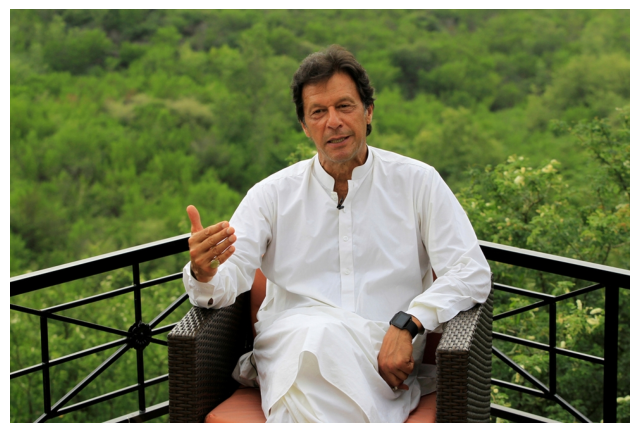

name  ['imrankhan']


In [28]:
import face_recognition
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def load_image(image_path):
    print("loading image..")
    image = face_recognition.load_image_file(image_path)
    print("encoding image..")
    encoding = face_recognition.face_encodings(image)[0]
    print("encoding done")
    return encoding

def get_name_from_path(image_path):
    """

    Args:
      image_path:

    Returns:

    """
    print("getting name from path..")
    # Extract the name from the filename (assuming the filename is the name)
    return os.path.splitext(os.path.basename(image_path))[0]



# Path to the image
image_path = "imrankhan.jpg"
# Load the image and get the encoding
encoding = load_image(image_path)


# List to store known face encodings and names
known_face_encodings = []
known_face_names = []


# Append the encoding and the name to the lists
known_face_encodings.append(encoding)
known_face_names.append(get_name_from_path(image_path))

pillow_image = Image.open(image_path)
# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(pillow_image)
plt.axis('off')
plt.show()

# Print to verify
print("name ", known_face_names)


loading unknown image..
finding faces in unknow image..
Number of faces detected: 2
Calculate text size
Calculate text size


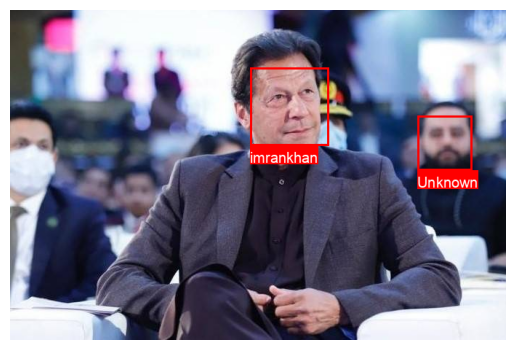

saving image..


In [29]:
import face_recognition
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


# Step 2: Load the unknown image
print("loading unknown image..")
unknown_image_path = "hello.jpg"
unknown_image = face_recognition.load_image_file(unknown_image_path)

# Step 3: Find faces in the unknown image
print("finding faces in unknow image..")
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)


# Number of faces detected
num_faces = len(face_locations)
print(f"Number of faces detected: {num_faces}")
# Convert to PIL format for drawing
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

# Load a font
font_size = 20  # Change this value to set the font size
font = ImageFont.truetype("Arial.ttf", font_size)

# Step 4: Compare faces with known faces
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # If a match was found, use the name of the first match
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # Draw a rectangle around the face
    draw.rectangle(((left, top), (right, bottom)), outline="red", width=3)

    # Calculate text size
    print("Calculate text size")
    text_bbox = draw.textbbox((left, bottom), name, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Draw a filled rectangle behind the text
    draw.rectangle(((left, bottom), (left + text_width, bottom + text_height + 10)), fill="red")

    # Draw the name below the face
    draw.text((left, bottom + 5), name, fill="white", font=font)

# Display the image with names and rectangles
# Display the image using matplotlib
plt.imshow(pil_image)
plt.axis('off')
plt.show()

# Save the image
print("saving image..")
pil_image.save("output_image.jpg")

